In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## refrence : https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv 

In [2]:
df=pd.read_csv('airline_tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<Axes: xlabel='airline', ylabel='count'>

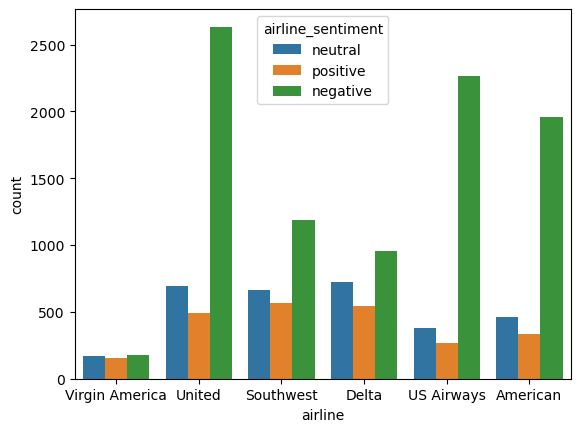

In [5]:
sns.countplot(data=df , x='airline' ,hue='airline_sentiment')

<Axes: xlabel='airline_sentiment', ylabel='count'>

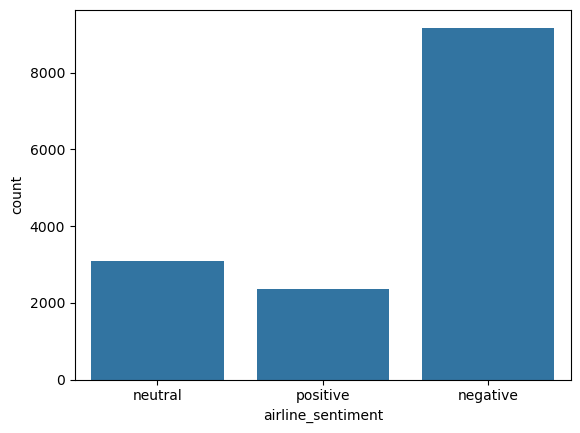

In [6]:
sns.countplot(data=df , x='airline_sentiment')

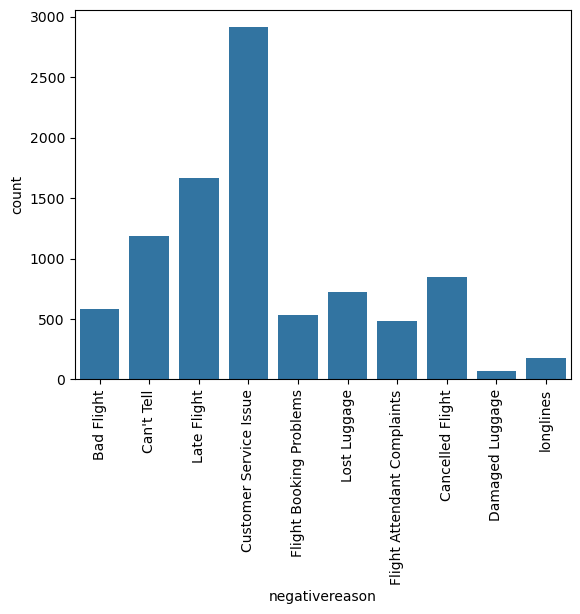

In [7]:
sns.countplot(data=df , x='negativereason')
plt.xticks(rotation=90);

# train test split

In [8]:
data=df[['text' , 'airline_sentiment']]
X=data['text']
y=data['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
tfidf=TfidfVectorizer(stop_words='english')
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [10]:
tfidf.vocabulary_

{'united': 12022,
 'hi': 6014,
 'relative': 9648,
 'flight': 5168,
 'booking': 2645,
 'problems': 9187,
 'number': 8319,
 'my8yb4': 7968,
 'clarita': 3269,
 'jaramillo': 6689,
 'mejia': 7657,
 'thank': 11341,
 'americanair': 1889,
 'served': 10313,
 'nastiest': 8035,
 'food': 5293,
 'ive': 6645,
 'seen': 10262,
 'yesterday': 12872,
 'rubber': 10005,
 'chicken': 3192,
 'slime': 10566,
 'entire': 4690,
 'cabin': 2900,
 'sent': 10294,
 'fas': 4986,
 'confirm': 3525,
 'yes': 12869,
 'partly': 8684,
 'used': 12189,
 'del': 4000,
 'ewr': 4799,
 'return': 9835,
 'cancelled': 2947,
 'flightled': 5197,
 'technical': 11273,
 'glitch': 5630,
 'operations': 8479,
 'jetblue': 6725,
 'helping': 5989,
 'bunch': 2828,
 'trying': 11717,
 'time': 11472,
 'fly': 5239,
 'terrible': 11311,
 'service': 10316,
 'ruined': 10013,
 'vacation': 12231,
 'lostsuitcase': 7341,
 'noreimbursement': 8246,
 'usairways': 12170,
 '2hrs': 593,
 'late': 7048,
 'flightr': 5205,
 'finally': 5096,
 'taking': 11213,
 'new': 81

# multinomial naive_bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train , y_train)

MultinomialNB()

# logestic_Regression

In [12]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

# linear suport vector classification

In [19]:
from sklearn.svm import LinearSVC
svc_model=LinearSVC(dual='auto')
svc_model.fit(X_train , y_train)

LinearSVC(dual='auto')

# metric Evaluation

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
def report(model , X_test , y_test):
    pred=model.predict(X_test)
    print(classification_report(y_test , pred))
    ConfusionMatrixDisplay.from_predictions(y_test , pred)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



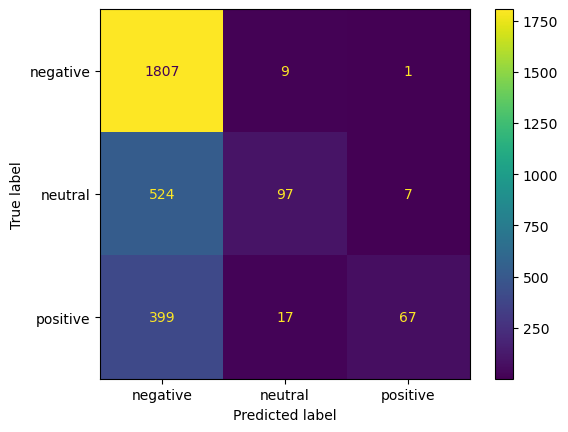

In [15]:
report(nb_model , X_test , y_test)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



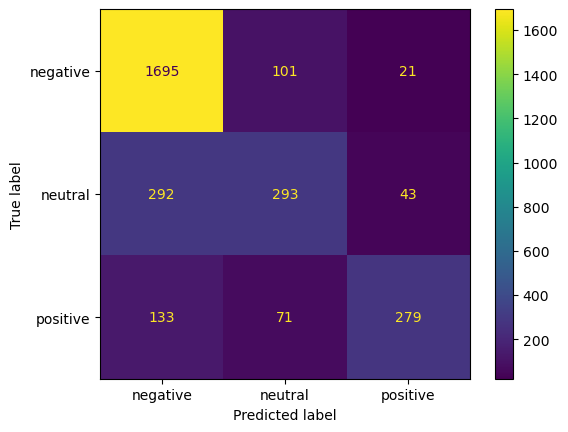

In [16]:
report(log_model , X_test , y_test)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



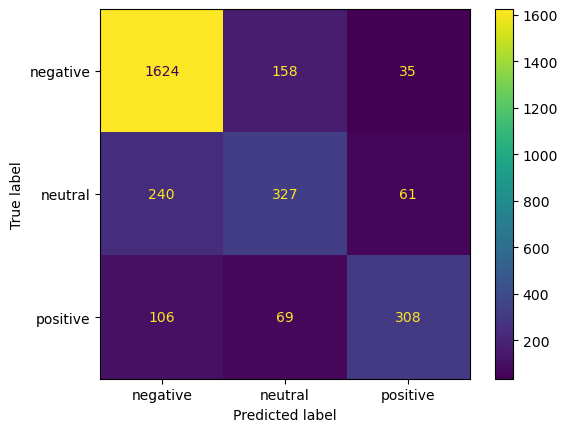

In [20]:
report(svc_model , X_test , y_test)

# PipeLine

In [27]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([('tfidf' , TfidfVectorizer()),('svc_model' , LinearSVC(dual='auto'))])
pipe.fit(df['text'] , df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc_model', LinearSVC(dual='auto'))])

In [28]:
new_tweet=['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [30]:
new_tweet=['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [33]:
new_tweet=['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)